In [23]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
from IPython.html.widgets import interact, interactive, fixed
from IPython.html import widgets
from IPython.display import clear_output, display, HTML
def euler( f, x0, t ):
    """Euler's method to solve x' = f(x,t) with x(t[0]) = x0.
    USAGE:
        x = euler(f, x0, t)
    INPUT:
        f     - function of x and t equal to dx/dt.  x may be multivalued,
                in which case it should a list or a NumPy array.  In this
                case f must return a NumPy array with the same dimension
                as x.
        x0    - the initial condition(s).  Specifies the value of x when
                t = t[0].  Can be either a scalar or a list or NumPy array
                if a system of equations is being solved.
        t     - list or NumPy array of t values to compute solution at.
                t[0] is the the initial condition point, and the difference
                h=t[i+1]-t[i] determines the step size h.
    OUTPUT:
        x     - NumPy array containing solution values corresponding to each
                entry in t array.  If a system is being solved, x will be
                an array of arrays.
    """
    n = len( t )
    x = np.array( [x0] * n )
    for i in xrange( n - 1 ):
        x[i+1] = x[i] + ( t[i+1] - t[i] ) * f( x[i], t[i] )
    return x

For free space the specific intencity of radiation is conserved $\frac{dI_{\nu}}{ds} = 0 $ 
<img src="http://www.cv.nrao.edu/course/astr534/images/absorb.svg">
If you  consider a ray as a beam of photons, some of which may be absorbed by the medium and vanish. The probability $dp_{\nu}$ of a photon with frequency $\nu$ being absorbed in a thin slab of thickness $ds$ is directly proportional to ds: $dp_{\nu}=\kappa_{\nu}ds$.  This frequency-dependent constant of proportionality is the linear absorption coefficient, $\kappa_{\nu} $ is defined $\kappa_{\nu} \equiv \frac{dp_{\nu}}{ds}$

The rate of absorbtion with distance into the medium is $\frac{dI_{\nu}}{I_{\nu}} =  -dp_{\nu} =-\kappa_{\nu}ds  $

Integrating both sides of this equation along the absorbing path gives the output specific intensity as a fraction of the input specific intensity:

 $\int^{s_{out}}_{s_{in}}  \frac{dI_{\nu}}{I_{\nu}} =\int^{s_{out}}_{s_{in}} -\kappa_{\nu}(s')ds'  = \ln(I_{\nu})\bracevert^{S_{out}}_{S_{in}} $

$\ln(I_{\nu}(s_{out})) - \ln(I_{\nu}(s_{out})) = \int^{s_{out}}_{s_{in}} -\kappa_{\nu}(s')ds'  $

$I_{\nu}(s_{out}) =  I_{\nu}(s_{out}) \ exp \int^{s_{out}}_{s_{in}} -\kappa_{\nu}(s')ds' $

The optical depth or opacity of the absorber is defined to be

$\tau \equiv \int^{s_{in}}_{s_{out}} -\kappa_{\nu}(s')ds'$

Note that $d\tau=−\kappa ds$.
*  $\tau \gg 1$ for opticaly thick
*  $\tau \ll 1$ for opticaly thin

Then we get 

$I_{\nu}(s_{out}) =  I_{\nu}(s_{out}) \ exp(-\tau_{\nu}) $


In [24]:
S_in = 0.0   
S_out = 100.0
I = 1.0  # Specific intensity of the source
kappa = 1./30. # Linear absorbtion coefficient
e = 0.0 #1   # Emission coeffieient
s = np.arange(S_in,S_out,0.01) # Values for plotting

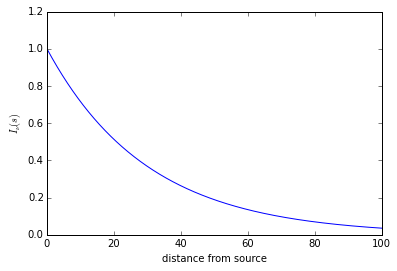

In [25]:
def absorbtion(kappa,epsilon=0):
    def dIds(i,s):
        return (-kappa*i + epsilon)

    a = plt.plot(s,euler(dIds,I,s))
    plt.ylabel(r"$I_{\nu}(s)$")
    plt.xlabel(r"distance from source")
    a = plt.ylim(0,plt.ylim()[1]*1.2)

absorbtion(kappa)    

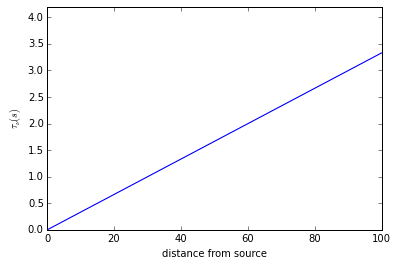

In [26]:
def tau(S_in,S_out,kappa):
    sp = np.arange(S_in,S_out,0.1 )
    sp = sp[::-1] # reverse the array
    return np.trapz(-kappa*np.ones_like(sp),sp)

def optical_depth(kappa):
    tau_func = np.zeros_like(s)
    for i,s_out in enumerate(s):
        tau_func[i] = tau(S_in,s_out,kappa)
    a = plt.plot(s,tau_func)
    plt.ylabel(r"$\tau_{\nu}(s)$")
    plt.xlabel(r"distance from source")
    a = plt.ylim(None,plt.ylim()[1]*1.2)

optical_depth(kappa)

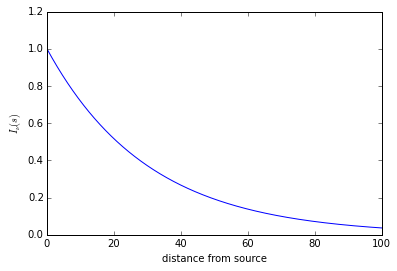

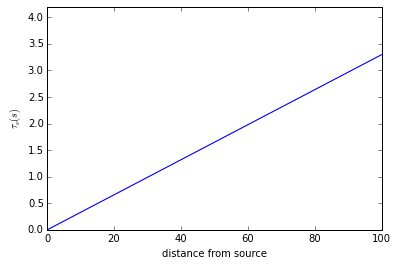

In [27]:
def interactionfunc(kappa):
    plt.figure()
    absorbtion(kappa)
    plt.figure()
    optical_depth(kappa)

i = interact(interactionfunc,
         kappa=widgets.FloatSliderWidget(min=0.0, max=0.1, step=0.001, 
                                         value=0.033),)



##Emission##

The intervening medium may also generate, or emit, photons, again by some unspecified microscopic process. In any small volume ($dsd\sigma$) of space, the probability per unit time that a photon having frequency $\nu$ will be emitted into the solid angle $d\Omega$ is directly proportional to that volume and solid angle: $P_{em} \propto  dsd\sigma d\Omega$

The emission coefficient $\epsilon_{nu} $ is defined as

$\epsilon_{nu} \equiv \frac {dI_{\nu}}{ds} $ 

The full equation of radiative transfer , (for both Emission and absorbtion) is given below

$\frac{dI_{\nu}}{ds} = -\kappa_{\nu}I_{\nu} + \epsilon_{\nu} $



In [28]:
S_in = 0.0   
S_out = 100.0
I = 1.0  # Specific intensity of the source
kappa = 0.1 # Linear absorbtion coefficient
epsilon = 0.2 #1   # Emission coeffieient
s = np.arange(S_in,S_out,0.01) # Values for plotting

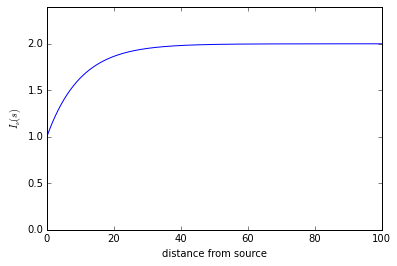

In [29]:
def transfer(kappa,epsilon):
    def dIds(i,s):
        return (-kappa*i + epsilon)

    a = plt.plot(s,euler(dIds,I,s))
    plt.ylabel(r"$I_{\nu}(s)$")
    plt.xlabel(r"distance from source")
    a = plt.ylim(0,plt.ylim()[1]*1.2)

transfer(kappa,epsilon)    


#Temperature#

In (full) thermodynamic equilibrium (TE) ,$\frac{dI_{\nu}}{ds} = 0$,at temperature T, (and has a black body spectrum $i_{\nu} = B_{\nu}$)<br>

$\frac{dI_{\nu}}{ds} = 0 =  -\kappa_{\nu}I_{\nu} + \epsilon_{\nu}=  -\kappa_{\nu}B_{\nu} + \epsilon_{\nu}  $

Yields Kirchoff's law

$\frac{\kappa_{\nu}} {\epsilon_{\nu} } = B_{\nu}(T)$

This Law holds in any matairial that is in equilibrium (Has a well-defined temperature), even if it is not in equilibrium with 
the radiation field.


The Rayleigh-Jeans approximation ,

$I_{\nu} = B_{\nu} \approx \frac {2kT_b\nu^2}{c^2}$ 

for the spectral brightness of a blackbody for low (Radio) frequencies.

Radio astronomers often find it convenient to specify the spectral brightness $I_{\nu}$, even if $I_{\nu} \ne B_{\nu}$, in terms of the equivalent blackbody brightness temperature $T_b$ defined by 

$T_b(\nu) \equiv \frac { I_{\nu} c^2} {2 k \nu^2}$ .

This is used for any $I_{\nu}$  blackbody or other. So in many cases the temperature calculated, would not be a real physical temperature. 



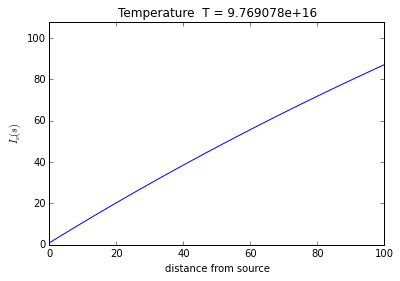

In [30]:
S_in = 0.0   
S_out = 100.0
I = 1.0  # Specific intensity of the source
kappa = 0.003 # Linear absorbtion coefficient
epsilon = 1 #1   # Emission coeffieient
s = np.arange(S_in,S_out,0.01) # Values for plotting
def brightnesstemp(I,nu = 10.0**10  ): 
    k = 1.380e-23   #J/K
    #nu = 10.0**10   #Hz
    c = 299792458   #m/s
    T = I*c**2 / (2*k*nu**2)
    return T


def transfer(kappa,epsilon):
    def dIds(i,s):
        return (-kappa*i + epsilon)

    a = plt.plot(s,euler(dIds,I,s))
    plt.title(r"Temperature  T = %e"%(brightnesstemp(kappa/epsilon,nu = 10.0**10  )))
    plt.ylabel(r"$I_{\nu}(s)$")
    plt.xlabel(r"distance from source")
    a = plt.ylim(0,plt.ylim()[1]*1.2)

transfer(kappa,epsilon)    

##Emission and absorption of radio waves in the Earth's atmosphere##

At high ($\nu >$10 GHz) radio frequencies, absorption by the Earth's atmosphere can be large enough to affect the accuracy of flux-density measurements.  Radio astronomers often determine the amount of atmospheric absorption by measuring the change in atmospheric emission at different angles from the zenith (the zenith is the direction straight up) and using Kirchoff's law. 

They use Kirchoff's law to calculate the zenith opacity of the (roughly isothermal) atmosphere at frequency $\nu$ from its kinetic (thermometer) temperature $T_A$ and its radio brightness.

(The celestial sky above the atmosphere is relatively cold, so the "background'' emission above the atmosphere can usually be ignored.)

<img src="http://www.cv.nrao.edu/course/astr534/images/atmtilt.svg">

Most atmospheric emission and absorption occurs in a layer whose height h is only a few km, much smaller than the radius of the Earth, so the plane-parallel approximation for the spherical Earth shown here is accurate.   

Procedure: Tip the radio telescope, measure I as a function of the zenith angle z, the angle between the zenith (vertical) and the incoming ray. Practical complications include:

*    The atmospheric signal is noise indistinguishable from other noise sources, such as noise generated in the receiver. The output voltage of the radio receiver is usually proportional to the sum of the input noise powers.  The  amount of receiver noise power may not be well known, so only the change in I with zenith angle z can be measured, not the absolute value of I at any zenith angle.

*    The power gain of the receiver system is difficult to calculate from first principles, so most measurements are made relative to some calibration source. For example, the receiver might be calibrated by having the feed look alternately at two absorbing plates with different known temperatures. The KAT-7 injects a signal with a know noise to provide this calibration. 


The radiative transfer equation 

$\frac{dI_{\nu}}{ds} = -\kappa_{\nu}I_{\nu} + \epsilon_{\nu} $

Because the atmosphere is in LTE, we can eliminate the unknown $\epsilon_{\nu}$ with Kirchoff's law

$\frac{\kappa_{\nu}} {\epsilon_{\nu} } = B_{\nu}(T)$

$ \epsilon_{\nu}  = B_{\nu}(T_A) \kappa_{\nu}$

With the optical depth defined as

$\tau \equiv \int^{s_{in}}_{s_{out}} -\kappa_{\nu}(s')ds'$

gives us

$\frac{1}{\kappa_{\nu}} \frac{dI_{\nu}}{ds}=\frac{-dI_{\nu}}{d\tau} = -I_{\nu} + B_{\nu}(T_A) $

Multiply both sides of this differential equation by exp(−$\tau$) and integrate along the ray in the telescope beam from the top of the atmosphere to the ground. Let $\tau_A(z)$ be the total optical depth of the atmosphere along the ray at zenith angle $z$. Then 

$\int_0^{\tau_{\rm A}} e^{-\tau} {d I_\nu
\over d \tau} d \tau = \int_0^{\tau_{\rm A}} [I_\nu - B_\nu(T_{\rm A})]
e^{-\tau} d\tau$

Next integrate the left side by parts and take $B_\nu(T_A)$ outside the integral (that is, make the approximation that the atmosphere below altitude $h$ is nearly isothermal).

$e^{-\tau} I_\nu
\vert_0^{\tau_{\rm A}} - \int_0^{\tau_{\rm A}} -e^{-\tau} I_\nu\ d \tau =
\int_0^{\tau_{\rm A}} I_\nu\ e^{-\tau} d\tau - B_\nu(T_{\rm A})
\int_0^{\tau_{\rm A}} e^{-\tau} d \tau$


$I_\nu(\tau = \tau_{\rm A})
e^{-\tau_{\rm A}} - I_\nu(\tau = 0) = B_\nu(T_{\rm A}) (e^{-\tau_{\rm
A}} - 1)$

We can neglect $I_\nu(\tau =\tau_{\rm A}) \approx 0$ because the brightness of emission above the atmosphere is relatively low at high radio frequencies.  


$I_\nu(\tau = 0) = ( 1 - e^{-\tau_{\rm A}}) B_\nu(T_{\rm
A})$

The path length through the atmophere is given by sec $z$ and the optical depth will be proportional to it.

$\tau_{\rm A} = \tau_{\rm Z}\, {\rm
sec}\, z$

where $\tau_{\rm Z} \equiv \tau_{\rm A} ( z = 0)$ is the zenith opacity of the atmosphere above the radio telescope.

$I_\nu =[1 - \exp(-\tau_{\rm Z}\, {\rm sec} \, z)]{2 k T_{\rm A} \nu^2 \over c^2}$

Thus we obtain an equation for the brightness temperature of the atmospheric emission as a function of zenith angle:

$T_{\rm b} = {I_\nu c^2 \over 2 k \nu^2} = T_{\rm A} \biggl[1 -
\exp (-\tau_{\rm Z}\,{\rm sec}\,z)\biggr]$

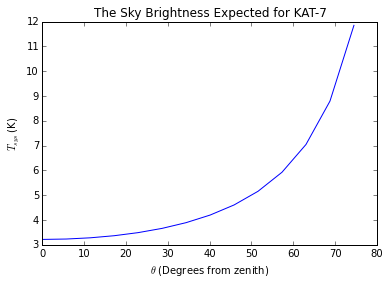

In [31]:
def BrightnessTemp(z,Ta=300,tau=0.1):
    """ z is in radians from zenith
    Tau is the optical depth at zenith
    Ta is the tempreture of the atmosphere
    """
    return Ta*(1-np.exp(-tau*(1./np.cos(z))))

z = np.arange(0,np.radians(80),0.1)

plt.title("The Sky Brightness Expected for KAT-7")
plt.ylabel(r'$T_{sys}$ (K)')
plt.xlabel(r'$\theta$ (Degrees from zenith)')
a =plt.plot(np.degrees(z),BrightnessTemp(z,Ta=300,tau=0.01078)) #

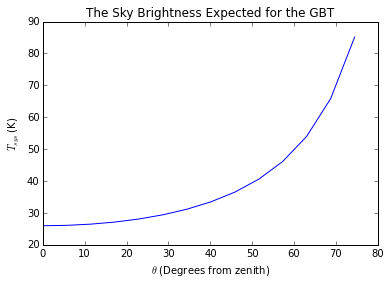

In [32]:
z = np.arange(0,np.radians(80),0.1)
# TA=273 K, Freq=90 GHz, Tau=0.1
plt.title("The Sky Brightness Expected for the GBT")
plt.ylabel(r'$T_{sys}$ (K)')
plt.xlabel(r'$\theta$ (Degrees from zenith)')
a =plt.plot(np.degrees(z),BrightnessTemp(z,Ta=273,tau=0.1)) #

###Some Real Data###
Taken at 1.822 GHz with the KAT-7 Telescope

In [33]:
# Elevation (degrees , theta = 90- elevation ), Tempreture (K)
data = np.array([[9.999859,50.783021],
[10.999985,49.208360],[11.999923,46.922415],[12.999903,47.282734],[13.999965,46.438570],
[14.999824,45.455341],[15.999968,45.563871],[16.999870,45.537372],[17.999921,45.696421],
[18.999962,44.631700],[19.999883,44.002024],[20.999978,43.355910],[21.999840,42.211496],
[22.999933,41.187965],[23.999927,41.826947],[24.999903,41.308392],[25.999973,41.527677],
[26.999832,41.326590],[28.000020,40.737671],[28.999924,40.074383],[29.999929,40.307134],
[30.999940,39.973544],[31.999934,39.629925],[32.999935,39.805148],[33.999889,39.391099],
[34.999959,39.047154],[35.999910,39.472337],[36.999917,39.044286],[37.999936,38.834996],
[38.999901,38.427615],[40.000005,38.671873],[40.999848,38.483898],[41.999968,38.618460],
[42.999916,38.764893],[43.999915,38.868643],[44.999985,38.507566],[45.999857,38.197458],
[47.000003,38.372948],[47.999930,38.332632],[48.999924,38.185084],[49.999965,38.607373],
[50.999888,37.657156],[51.999966,41.912973],[52.999914,37.386137],[53.999959,37.822439],
[54.999987,38.727511],[55.999918,38.064899],[56.999980,38.237169],[57.999882,38.164436],
[58.999943,37.641442],[59.999954,37.658072],[60.999932,37.196808],[62.000019,36.649414],
[62.999925,36.243716],[64.000016,36.616854],[64.999960,36.441829],[65.999996,36.699254],
[66.999978,36.374707],[67.999934,36.589543],[68.999971,36.308857],[69.999931,36.408245],
[70.999964,36.582212],[71.999937,36.677706],[72.999902,36.516294],[73.999993,36.756735],
[74.999907,38.123101],[75.999998,39.499840],[76.999955,39.778250],[77.999920,39.195052],
[78.999969,36.923722],[79.999925,35.671147],[80.999991,36.065941],[81.999889,36.372941],
[82.999954,35.879726],[83.999953,35.615894],[84.999968,36.048391],[85.999992,36.343065],
[86.999822,36.038417],[87.999972,35.756965],[88.999929,35.307035],[89.983248,36.844979]])

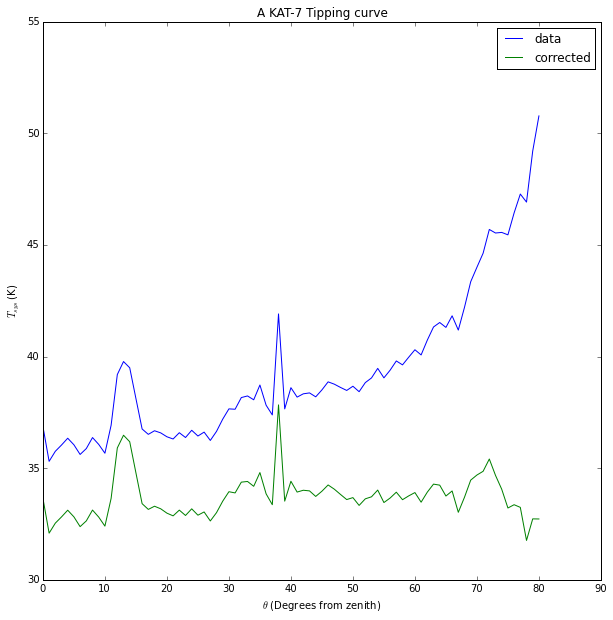

In [34]:
plt.figure(figsize=(10,10))
plt.title("A KAT-7 Tipping curve")
plt.ylabel(r'$T_{sys}$ (K)')
plt.xlabel(r'$\theta$ (Degrees from zenith)')
a =plt.plot(90-data[:,0],data[:,1],label='data')
a =plt.plot(90-data[:,0],data[:,1]-BrightnessTemp(np.radians(90-data[:,0]),Ta=300,tau=0.01078),label='corrected')
plt.legend(loc='best')